### Disclaimer: The dataset has minor modications to protect its condentiality.
### Description: You are given a dataset of patients to be tested for heart disease. Features are given below.
#### • age
#### • sex – Male, Female
#### • cp - chest pain type (4 values)
#### • trestbps - resting blood pressure
#### • chol - serum cholestoral in mg/dl
#### • fbs - fasting blood sugar > 120 mg/dl
#### • restecg - resting electrocardiographic results, values: 0,1,2
#### • thalach - maximum heart rate achieved
#### • exang - exercise induced angina
#### • oldpeak - ST depression induced by exercise relative to rest
#### • slope - the slope of the peak exercise ST segment
#### • ca - number of major vessels colored by flourosopy, values: 0,1,2,3,4
#### • thal - values: 0,1,2,3
#### • target – is the column we want to predict.
### You asked to create Support Vector Machine (with both Linear and RBF kernel) classifier, Decision Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, KNN classifier to predict whether patients have heart disease or not and decide which algorithm performs the best on average.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [3]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week5\heart.csv')
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# sns.pairplot(df)

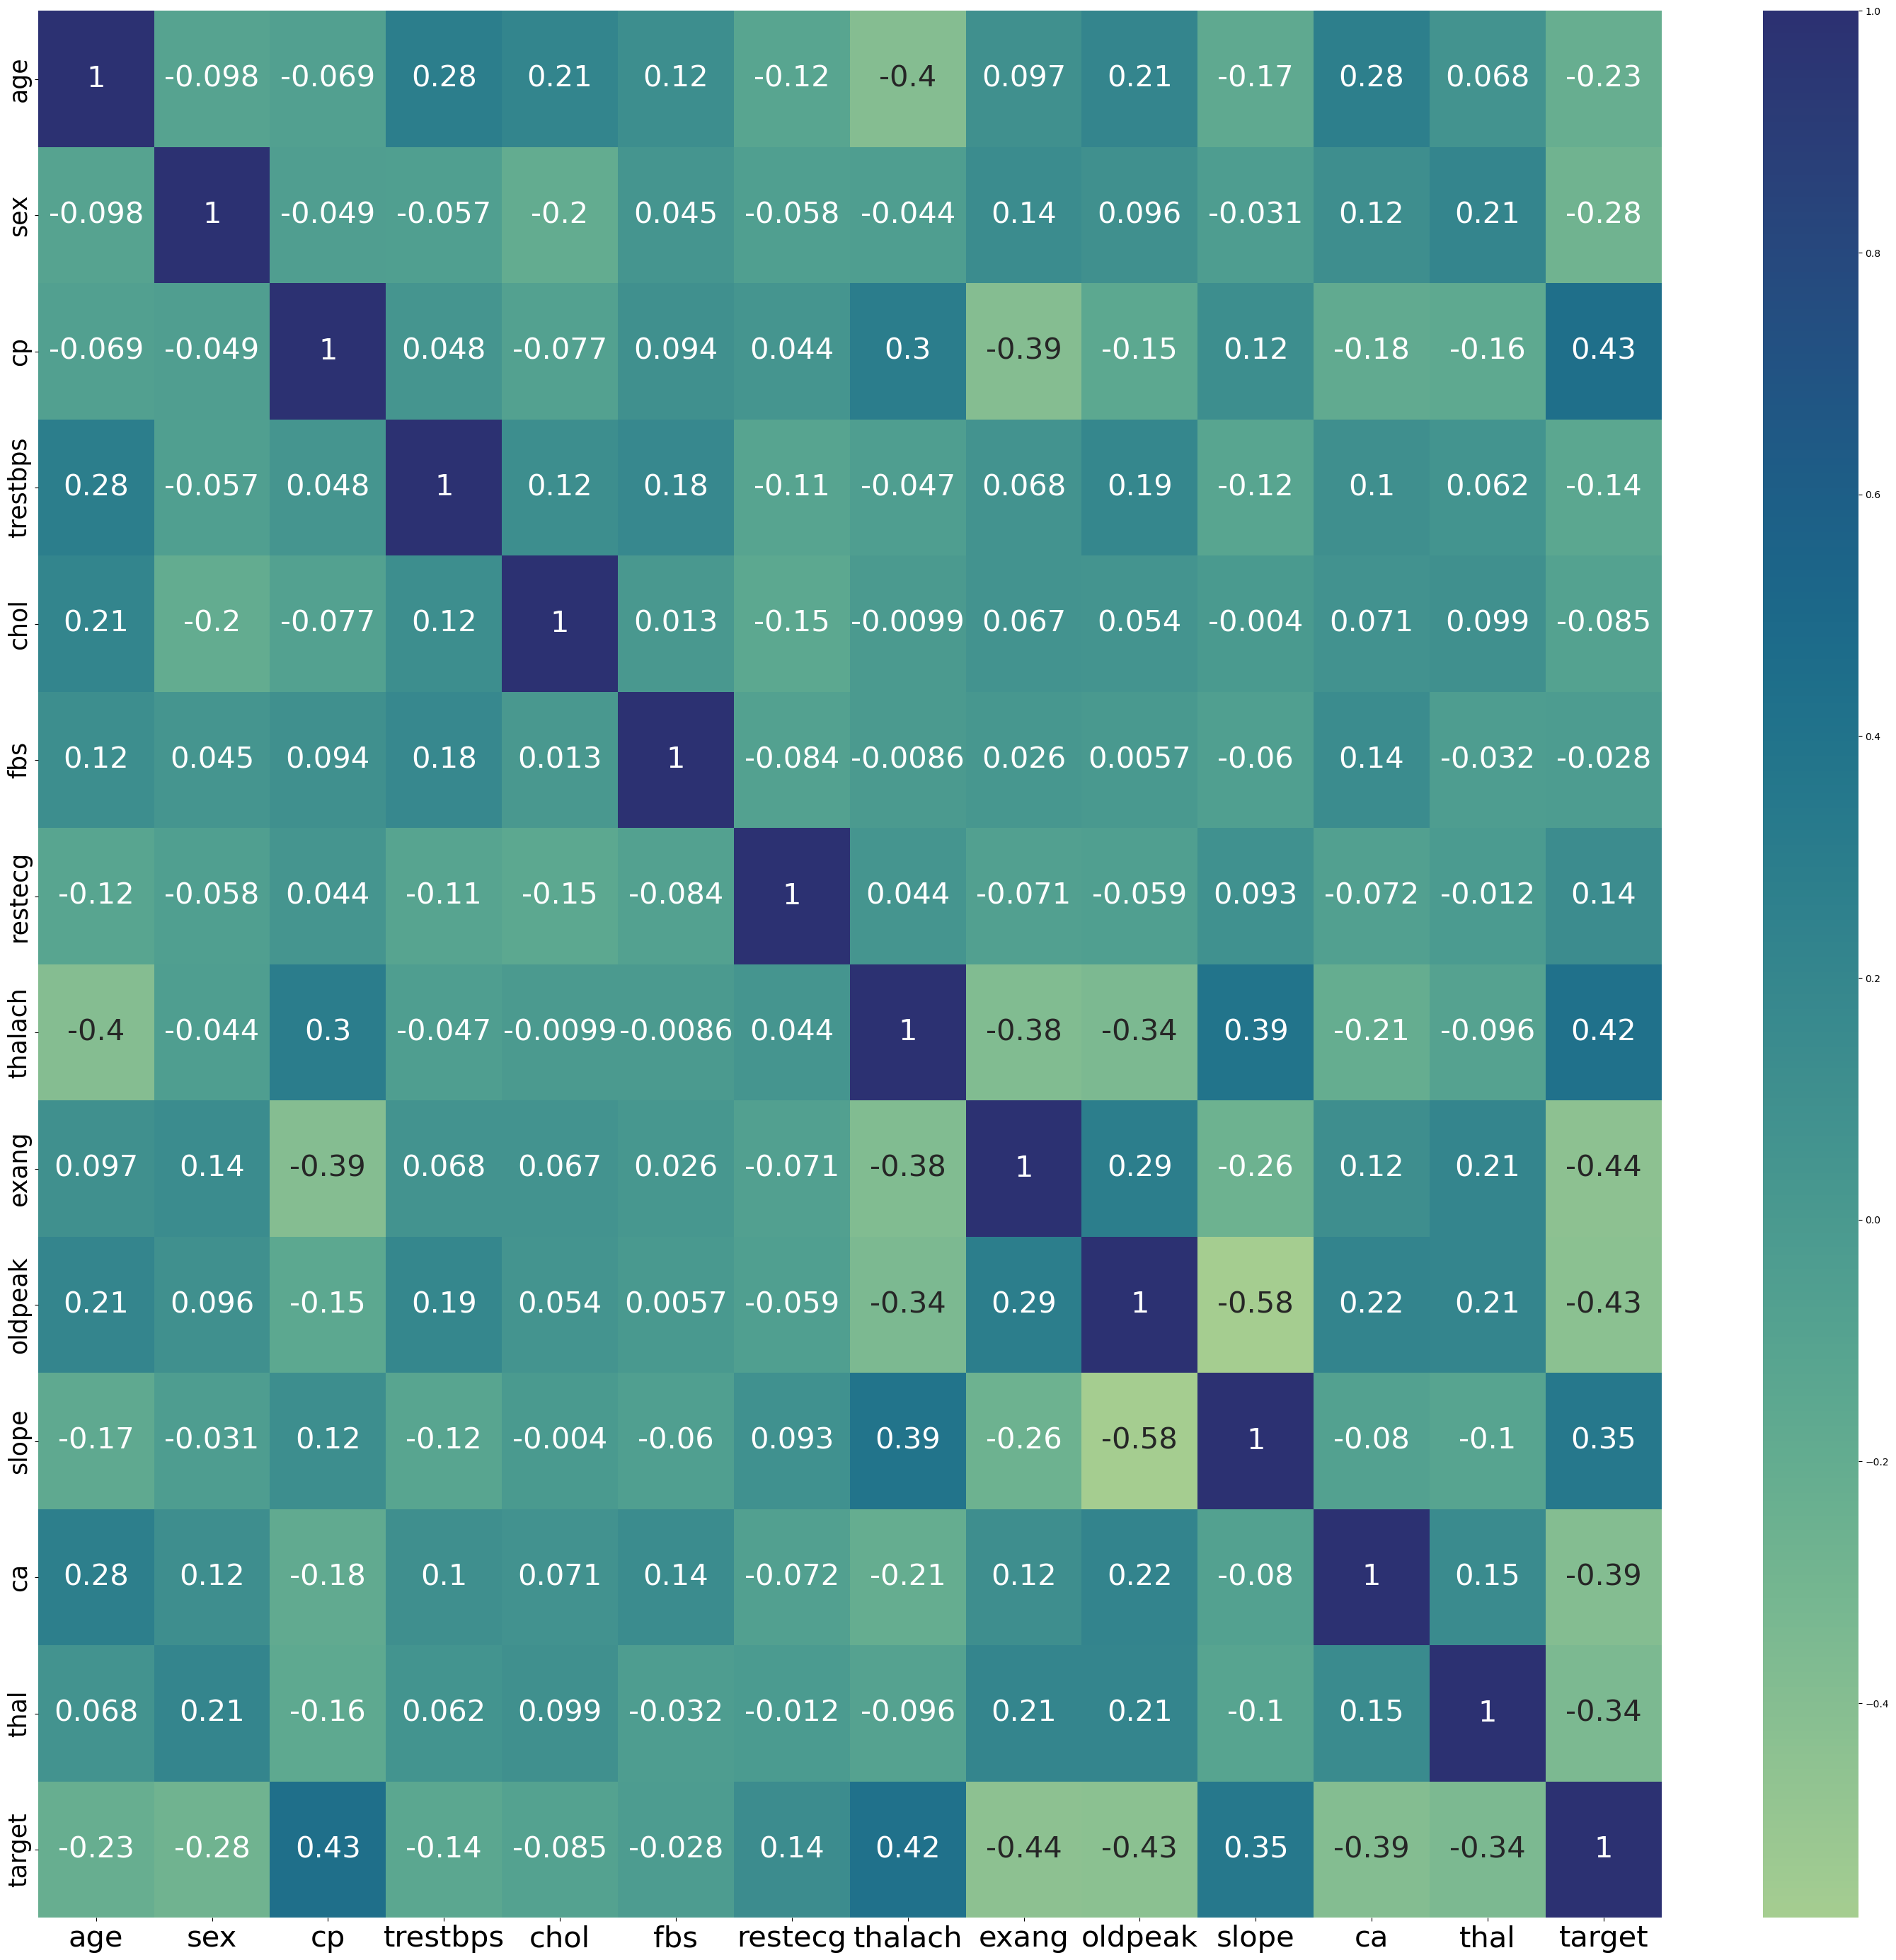

In [10]:
plt.figure(figsize=(37, 35))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 30}, cmap="crest")
plt.xticks(fontsize=30)  # Sütun adlarının ölçüsünü böyüdür
plt.yticks(fontsize=25)  # Sətir adlarının ölçüsünü böyüdür
plt.show()

In [11]:
df.cp.unique()

array([3, 2, 1, 0], dtype=int64)

In [12]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
df_out = df.copy()

In [15]:
df_out.drop_duplicates(inplace=True)

In [16]:
df_out[df_out.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### One Hot Encoding

In [17]:
df_out[['cp', 'thal']] = df_out[['cp', 'thal']].astype(object)
dns_df = df_out[['cp', 'thal']]

In [18]:
dns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cp      302 non-null    object
 1   thal    302 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB


In [19]:
dns_df = pd.get_dummies(dns_df, drop_first=True, dtype='int')
df_ = df_out.drop(df_out.select_dtypes(include='object').columns, axis=1)

df_final = pd.concat([df_, dns_df], axis=1)

In [20]:
df_final.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,1,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,1,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,1,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,0,0,0,0,1,0


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   trestbps  302 non-null    int64  
 3   chol      302 non-null    int64  
 4   fbs       302 non-null    int64  
 5   restecg   302 non-null    int64  
 6   thalach   302 non-null    int64  
 7   exang     302 non-null    int64  
 8   oldpeak   302 non-null    float64
 9   slope     302 non-null    int64  
 10  ca        302 non-null    int64  
 11  target    302 non-null    int64  
 12  cp_1      302 non-null    int32  
 13  cp_2      302 non-null    int32  
 14  cp_3      302 non-null    int32  
 15  thal_1    302 non-null    int32  
 16  thal_2    302 non-null    int32  
 17  thal_3    302 non-null    int32  
dtypes: float64(1), int32(6), int64(11)
memory usage: 37.8 KB


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
y = df_final['target'].values
X = df_final.drop('target', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 17), (76, 17), (226,), (76,))

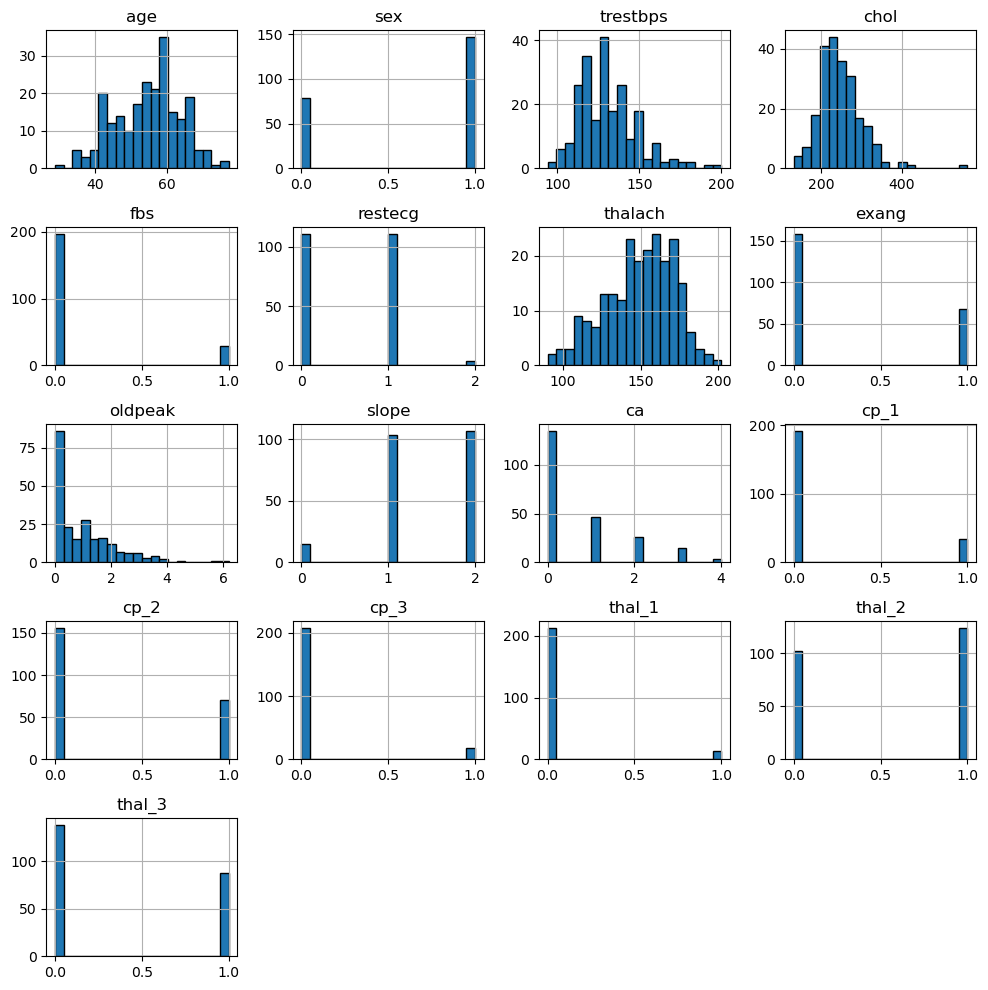

In [25]:
import matplotlib.pyplot as plt
X_train.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

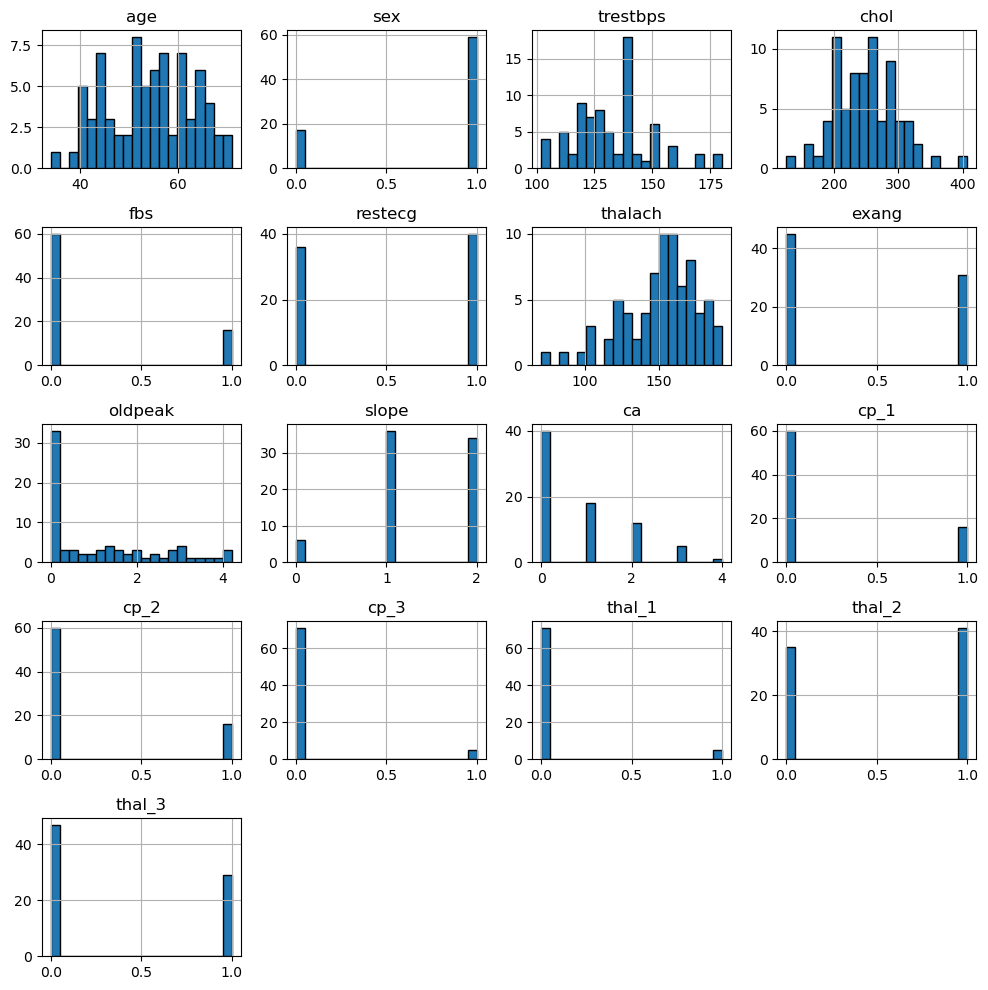

In [26]:
import matplotlib.pyplot as plt
# Histoqramı yaratmaq
X_test.hist(figsize=(10, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
rc = StandardScaler().fit(X_train)
X_train_scaled = rc.transform(X_train)
X_test_scaled = rc.transform(X_test)

#### StandardScaler ilə X_train məlumatlarınızı miqyaslandırdıqda (fit(X_train)), skaler X_train məlumatlarının ortalama və standart sapmasını hesablayır və bu dəyərləri saxlayır. Daha sonra, bu eyni statistikalardan istifadə edərək X_train və X_test məlumatlarını miqyaslandırmaq üçün transform() metodunu tətbiq edirsiniz.

#### Beləliklə, sizin kodunuzda X_test_scaled = rc.transform(X_test) əməliyyatı X_test məlumatlarını X_train məlumatlarına əsasən miqyaslandırır. Bu, düzgün yanaşmadır, çünki modelinizi öyrədərkən yalnız X_train məlumatlarını istifadə etməli və modelinizi test edərkən yalnız X_train üzərində öyrəndiyiniz parametrləri (mean və std) istifadə edərək X_test məlumatlarını miqyaslandırmalısınız.

#### Əgər siz StandardScaler().fit(X_test) ilə X_test məlumatlarını ayrıca miqyaslandırsaydınız, bu data leakage (məlumat sızması) olaraq adlandırılırdı və model performansınızı qeyri-realist şəkildə yaxşılaşdırardı. Yəni, sınaq məlumatları əvvəlcədən təlim məlumatlarının miqyasını təyin etmək üçün istifadə olunmamalıdır.

#### Beləliklə, StandardScaler().fit(X_train) üzərində miqyaslandıqdan sonra həm X_train, həm də X_test məlumatlarını rc.transform() vasitəsilə miqyaslandırmaq doğru yanaşmadır.

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression as logReg
classifier = logReg(random_state=42)
logistic_model = classifier.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [29]:
y_pred_logistic

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [30]:
y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_pred_logistic_proba

array([0.02663907, 0.31888315, 0.87101846, 0.03578664, 0.97731081,
       0.95423274, 0.52821742, 0.02719204, 0.01162464, 0.56118675,
       0.63579208, 0.0260711 , 0.9296271 , 0.12348944, 0.98755252,
       0.95515962, 0.98248157, 0.0035405 , 0.005739  , 0.02866516,
       0.3074724 , 0.0157187 , 0.31406562, 0.73489362, 0.94933923,
       0.53944993, 0.00426995, 0.60453652, 0.01320086, 0.93315238,
       0.03554393, 0.03279692, 0.42430865, 0.19119519, 0.61576334,
       0.02290409, 0.87621182, 0.94027727, 0.57364438, 0.86454251,
       0.5405646 , 0.81040001, 0.89265954, 0.81423768, 0.78717435,
       0.1138069 , 0.43317494, 0.97225899, 0.05000997, 0.01697496,
       0.00598014, 0.00393569, 0.71168296, 0.98811985, 0.03266076,
       0.19232662, 0.00102919, 0.97813685, 0.03116522, 0.70654697,
       0.57540534, 0.91782826, 0.17243799, 0.19744759, 0.80852657,
       0.96276914, 0.78543274, 0.80417519, 0.75006174, 0.02750407,
       0.96674496, 0.8620658 , 0.26642297, 0.86365351, 0.00870

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_logistic))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_logistic))
print('roc auc score: ', roc_auc_score(y_test, y_pred_logistic))
print('recall score: ', recall_score(y_test, y_pred_logistic))
print('precesion score: ', precision_score(y_test, y_pred_logistic))
print('f1 score: ', f1_score(y_test, y_pred_logistic))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_logistic))

confiion martrix: 
 [[31  4]
 [ 4 37]]

accuracy_score 0.8947368421052632
roc auc score:  0.8940766550522647
recall score:  0.9024390243902439
precesion score:  0.9024390243902439
f1 score:  0.9024390243902439

classification report:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        35
           1       0.90      0.90      0.90        41

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



In [32]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=logistic_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall'])
accuracies

{'fit_time': array([0.01400995, 0.01501155, 0.01701117, 0.01904178]),
 'score_time': array([0.02802396, 0.03002191, 0.02501249, 0.02499461]),
 'test_f1': array([0.88888889, 0.82539683, 0.83076923, 0.81967213]),
 'test_roc_auc': array([0.86972705, 0.86600496, 0.91025641, 0.92129032]),
 'test_recall': array([0.90322581, 0.83870968, 0.9       , 0.80645161])}

In [33]:
accuracies['test_f1'].mean()

0.8411817690506215

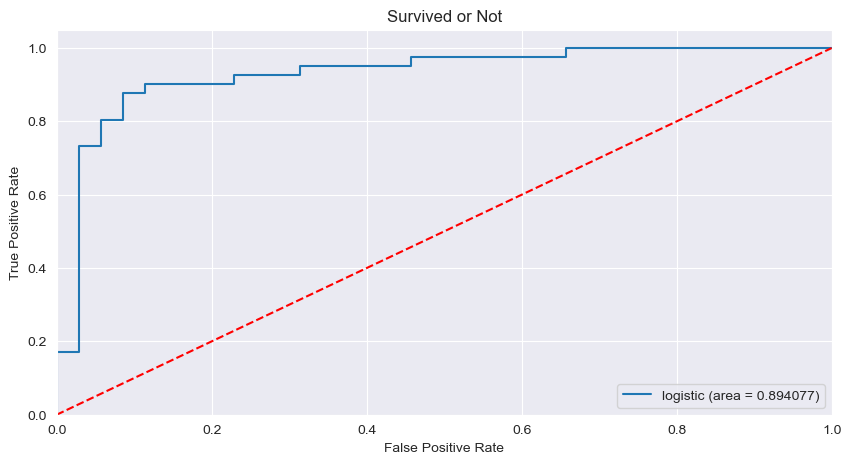

In [34]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic (area = %02f)' % Logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()

#### datanin train  uzerinden score-lara baxaq 

In [35]:
y_pred_logistic = logistic_model.predict(X_train_scaled)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_train, y_pred_logistic))
print()
print('accuracy_score', accuracy_score(y_train, y_pred_logistic))
print('roc auc score: ', roc_auc_score(y_train, y_pred_logistic))
print('recall score: ', recall_score(y_train, y_pred_logistic))
print('precesion score: ', precision_score(y_train, y_pred_logistic))
print('f1 score: ', f1_score(y_train, y_pred_logistic))
print()
print('classification report:\n\n', classification_report(y_train, y_pred_logistic))

confiion martrix: 
 [[ 82  21]
 [ 11 112]]

accuracy_score 0.8584070796460177
roc auc score:  0.8533428052727129
recall score:  0.9105691056910569
precesion score:  0.8421052631578947
f1 score:  0.8749999999999999

classification report:

               precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.84      0.91      0.87       123

    accuracy                           0.86       226
   macro avg       0.86      0.85      0.86       226
weighted avg       0.86      0.86      0.86       226



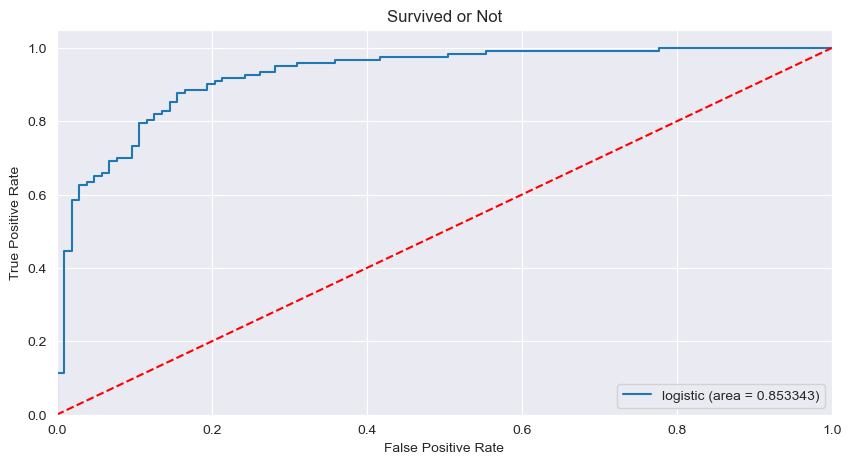

In [37]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logistic_roc_auc = roc_auc_score(y_train, logistic_model.predict(X_train_scaled))
fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba(X_train_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='logistic (area = %02f)' % Logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
KNN_model = classifier.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)

In [39]:
y_pred_KNN

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [40]:
y_pred_KNN_proba = KNN_model.predict_proba(X_test_scaled)[:, 1]
y_pred_KNN_proba

array([0.        , 0.28571429, 0.57142857, 0.28571429, 1.        ,
       0.85714286, 0.57142857, 0.        , 0.        , 0.85714286,
       0.28571429, 0.28571429, 1.        , 0.28571429, 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.42857143, 0.        , 0.57142857, 0.71428571, 1.        ,
       0.57142857, 0.        , 0.85714286, 0.14285714, 0.85714286,
       0.        , 0.        , 0.28571429, 0.28571429, 0.85714286,
       0.        , 0.71428571, 1.        , 0.57142857, 0.71428571,
       0.71428571, 0.85714286, 0.57142857, 0.85714286, 0.85714286,
       0.28571429, 0.42857143, 1.        , 0.14285714, 0.        ,
       0.14285714, 0.        , 0.28571429, 0.85714286, 0.        ,
       0.14285714, 0.        , 0.85714286, 0.14285714, 0.57142857,
       0.71428571, 1.        , 0.28571429, 0.28571429, 0.71428571,
       0.85714286, 0.85714286, 0.57142857, 0.71428571, 0.        ,
       1.        , 0.85714286, 0.42857143, 0.71428571, 0.     

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_KNN))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_KNN))
print('roc auc score: ', roc_auc_score(y_test, y_pred_KNN))
print('recall score: ', recall_score(y_test, y_pred_KNN))
print('precesion score: ', precision_score(y_test, y_pred_KNN))
print('f1 score: ', f1_score(y_test, y_pred_KNN))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_KNN))

confiion martrix: 
 [[30  5]
 [ 6 35]]

accuracy_score 0.8552631578947368
roc auc score:  0.8554006968641115
recall score:  0.8536585365853658
precesion score:  0.875
f1 score:  0.8641975308641976

classification report:

               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



In [42]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=KNN_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall'])
accuracies

{'fit_time': array([0.00200129, 0.00300527, 0.00200129, 0.00200176]),
 'score_time': array([0.23717546, 0.16413784, 0.15608883, 0.17709756]),
 'test_f1': array([0.79310345, 0.83076923, 0.8125    , 0.83333333]),
 'test_roc_auc': array([0.87593052, 0.8691067 , 0.83589744, 0.90129032]),
 'test_recall': array([0.74193548, 0.87096774, 0.86666667, 0.80645161])}

In [43]:
for key, value in accuracies.items():
    print(key, value.mean())

fit_time 0.0022523999214172363
score_time 0.18362492322921753
test_f1 0.8174265030946066
test_roc_auc 0.8705562448304385
test_recall 0.821505376344086


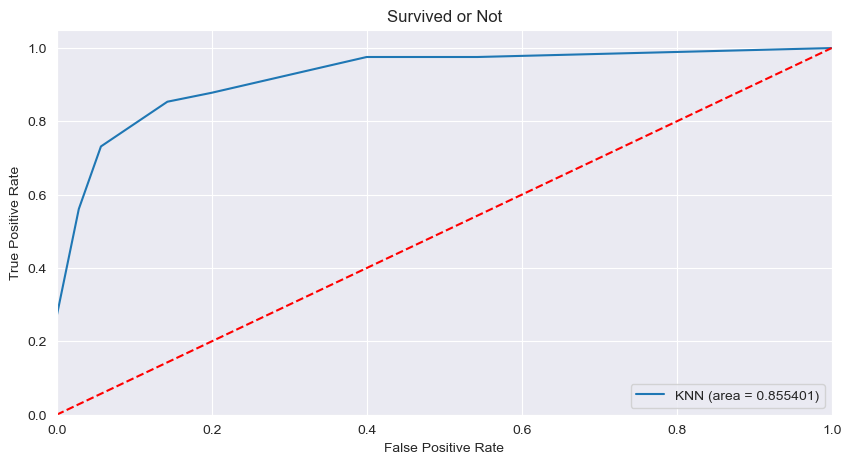

In [44]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KNN_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %02f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_model = classifier.fit(X_train_scaled, y_train)
y_pred_NB = NB_model.predict(X_test_scaled)
y_pred_NB

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [46]:
import numpy as np
np.set_printoptions(precision=4, suppress=True) 
y_pred_NB_proba = NB_model.predict_proba(X_test_scaled)[:, 1]
y_pred_NB_proba

array([0.0005, 0.0045, 0.9139, 0.    , 0.9989, 0.9989, 0.8394, 0.    ,
       0.    , 0.9768, 0.0001, 0.    , 1.    , 0.0007, 1.    , 0.9998,
       1.    , 0.    , 0.    , 0.    , 0.2521, 0.    , 0.0955, 0.9994,
       0.9996, 0.6774, 0.    , 0.8593, 0.0002, 0.9982, 0.0001, 0.0002,
       0.    , 0.0043, 0.6608, 0.    , 0.9597, 0.9986, 0.6058, 0.9972,
       0.7142, 0.9965, 0.9996, 0.995 , 0.9923, 0.0154, 0.0758, 1.    ,
       0.    , 0.0002, 0.    , 0.    , 0.0098, 0.9998, 0.0038, 0.0097,
       0.    , 0.9998, 0.    , 0.5305, 0.9839, 1.    , 0.0009, 0.0152,
       0.9996, 0.9995, 0.9942, 0.9979, 0.9995, 0.    , 1.    , 0.9984,
       0.0002, 0.9967, 0.    , 0.9999])

In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_NB))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_NB))
print('roc auc score: ', roc_auc_score(y_test, y_pred_NB))
print('recall score: ', recall_score(y_test, y_pred_NB))
print('precesion score: ', precision_score(y_test, y_pred_NB))
print('f1 score: ', f1_score(y_test, y_pred_NB))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_NB))

confiion martrix: 
 [[31  4]
 [ 6 35]]

accuracy_score 0.868421052631579
roc auc score:  0.8696864111498257
recall score:  0.8536585365853658
precesion score:  0.8974358974358975
f1 score:  0.875

classification report:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.90      0.85      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [48]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=NB_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
accuracies

{'fit_time': array([0.004, 0.004, 0.004, 0.004]),
 'score_time': array([0.033, 0.031, 0.03 , 0.048]),
 'test_f1': array([0.8136, 0.8333, 0.8308, 0.8276]),
 'test_roc_auc': array([0.866 , 0.8983, 0.8308, 0.9161]),
 'test_recall': array([0.7742, 0.8065, 0.9   , 0.7742]),
 'test_precision': array([0.8571, 0.8621, 0.7714, 0.8889]),
 'test_accuracy': array([0.807 , 0.8246, 0.8036, 0.8214])}

In [49]:
for key, value in accuracies.items():
    print(key, value.mean())

fit_time 0.004002809524536133
score_time 0.03552377223968506
test_f1 0.8263120232582535
test_roc_auc 0.8777915632754343
test_recall 0.8137096774193548
test_precision 0.8448823207443896
test_accuracy 0.8141447368421053


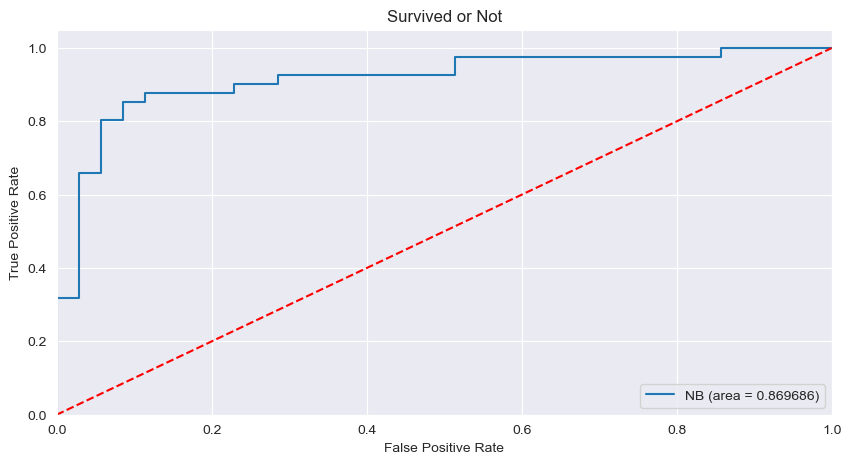

In [50]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, NB_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='NB (area = %02f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### SVM  'rbf'

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf", probability=True, random_state=4)
SVM_model = classifier.fit(X_train_scaled, y_train)
y_pred_SVM = SVM_model.predict(X_test_scaled)
y_pred_SVM

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [52]:
y_pred_SVM_proba = SVM_model.predict_proba(X_test_scaled)[:, 1]
y_pred_SVM_proba

array([0.0678, 0.4677, 0.8421, 0.3628, 0.8755, 0.8892, 0.691 , 0.0573,
       0.0538, 0.7216, 0.4365, 0.354 , 0.9316, 0.3419, 0.938 , 0.9135,
       0.9107, 0.013 , 0.0261, 0.1108, 0.3358, 0.1611, 0.6292, 0.8043,
       0.9222, 0.385 , 0.0382, 0.6669, 0.0245, 0.9033, 0.1126, 0.0552,
       0.3868, 0.367 , 0.5775, 0.189 , 0.8546, 0.9367, 0.5919, 0.7973,
       0.7669, 0.8457, 0.8028, 0.8372, 0.7278, 0.4719, 0.5   , 0.916 ,
       0.1951, 0.1299, 0.2166, 0.0146, 0.4899, 0.959 , 0.0375, 0.162 ,
       0.0521, 0.9393, 0.2437, 0.6099, 0.5421, 0.9248, 0.4476, 0.5722,
       0.7916, 0.9594, 0.84  , 0.5251, 0.7689, 0.0853, 0.9017, 0.8991,
       0.5306, 0.7971, 0.0563, 0.9411])

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_SVM))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_SVM))
print('roc auc score: ', roc_auc_score(y_test, y_pred_SVM))
print('recall score: ', recall_score(y_test, y_pred_SVM))
print('precesion score: ', precision_score(y_test, y_pred_SVM))
print('f1 score: ', f1_score(y_test, y_pred_SVM))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_SVM))

confiion martrix: 
 [[29  6]
 [ 6 35]]

accuracy_score 0.8421052631578947
roc auc score:  0.841114982578397
recall score:  0.8536585365853658
precesion score:  0.8536585365853658
f1 score:  0.8536585365853658

classification report:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [54]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=SVM_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
accuracies

{'fit_time': array([0.034, 0.033, 0.035, 0.033]),
 'score_time': array([0.0381, 0.037 , 0.036 , 0.036 ]),
 'test_f1': array([0.7931, 0.8387, 0.806 , 0.8475]),
 'test_roc_auc': array([0.897 , 0.8821, 0.8833, 0.9135]),
 'test_recall': array([0.7419, 0.8387, 0.9   , 0.8065]),
 'test_precision': array([0.8519, 0.8387, 0.7297, 0.8929]),
 'test_accuracy': array([0.7895, 0.8246, 0.7679, 0.8393])}

In [55]:
for key, value in accuracies.items():
    print(key, value)

fit_time [0.034 0.033 0.035 0.033]
score_time [0.0381 0.037  0.036  0.036 ]
test_f1 [0.7931 0.8387 0.806  0.8475]
test_roc_auc [0.897  0.8821 0.8833 0.9135]
test_recall [0.7419 0.8387 0.9    0.8065]
test_precision [0.8519 0.8387 0.7297 0.8929]
test_accuracy [0.7895 0.8246 0.7679 0.8393]


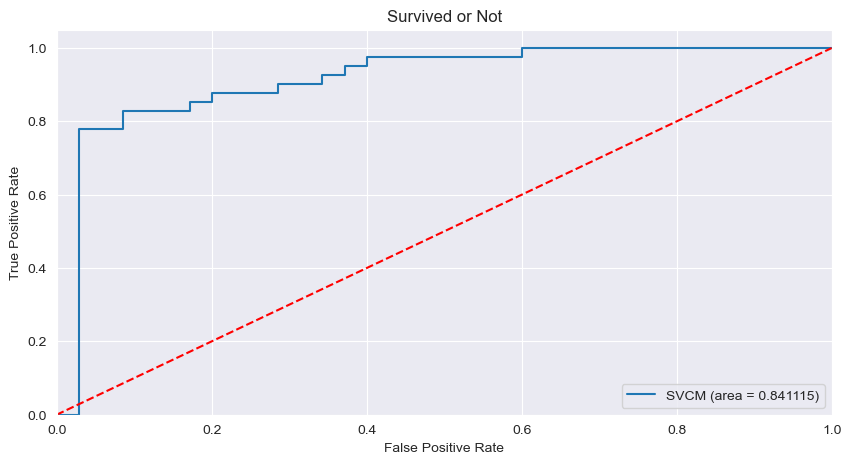

In [56]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, SVM_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVCM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### SVM 'linear'

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", probability=True, random_state=4)
SVM_model = classifier.fit(X_train_scaled, y_train)
y_pred_SVM = SVM_model.predict(X_test_scaled)
y_pred_SVM

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [58]:
y_pred_SVM_proba = SVM_model.predict_proba(X_test_scaled)[:, 1]
y_pred_SVM_proba

array([0.0929, 0.3929, 0.7513, 0.1022, 0.9398, 0.8953, 0.6018, 0.0805,
       0.0632, 0.6188, 0.6969, 0.1309, 0.863 , 0.2142, 0.9379, 0.9111,
       0.9171, 0.0282, 0.028 , 0.1173, 0.5147, 0.0798, 0.4344, 0.651 ,
       0.8541, 0.5324, 0.0277, 0.707 , 0.0704, 0.8901, 0.1076, 0.1138,
       0.5942, 0.355 , 0.665 , 0.0994, 0.8358, 0.86  , 0.5918, 0.85  ,
       0.4728, 0.7467, 0.8402, 0.7646, 0.6586, 0.1907, 0.5   , 0.9191,
       0.1672, 0.0926, 0.0355, 0.028 , 0.6446, 0.9521, 0.1208, 0.2899,
       0.008 , 0.9318, 0.0897, 0.7095, 0.6382, 0.8294, 0.3344, 0.3103,
       0.743 , 0.9249, 0.7736, 0.7346, 0.7048, 0.0893, 0.8688, 0.8117,
       0.3757, 0.8492, 0.041 , 0.8293])

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_SVM))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_SVM))
print('roc auc score: ', roc_auc_score(y_test, y_pred_SVM))
print('recall score: ', recall_score(y_test, y_pred_SVM))
print('precesion score: ', precision_score(y_test, y_pred_SVM))
print('f1 score: ', f1_score(y_test, y_pred_SVM))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_SVM))

confiion martrix: 
 [[30  5]
 [ 5 36]]

accuracy_score 0.868421052631579
roc auc score:  0.8675958188153311
recall score:  0.8780487804878049
precesion score:  0.8780487804878049
f1 score:  0.8780487804878049

classification report:

               precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [60]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=SVM_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [0.0531 0.058  0.056  0.0841]
score_time [0.042 0.034 0.067 0.036]
test_f1 [0.8889 0.8125 0.8116 0.8387]
test_roc_auc [0.871  0.871  0.9282 0.9135]
test_recall [0.9032 0.8387 0.9333 0.8387]
test_precision [0.875  0.7879 0.7179 0.8387]
test_accuracy [0.8772 0.7895 0.7679 0.8214]


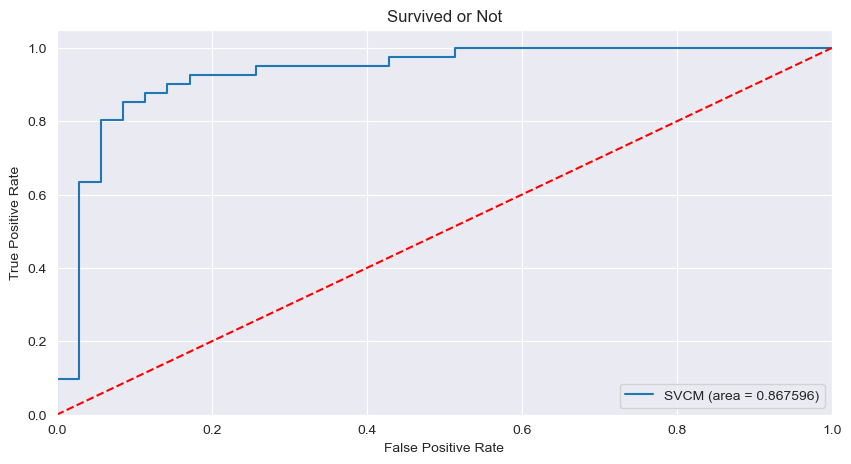

In [61]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, SVM_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVCM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### SVM 'poly'

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel="poly", probability=True, random_state=4)
SVM_model = classifier.fit(X_train_scaled, y_train)
y_pred_SVM = SVM_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_SVM))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_SVM))
print('roc auc score: ', roc_auc_score(y_test, y_pred_SVM))
print('recall score: ', recall_score(y_test, y_pred_SVM))
print('precesion score: ', precision_score(y_test, y_pred_SVM))
print('f1 score: ', f1_score(y_test, y_pred_SVM))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_SVM))

confiion martrix: 
 [[28  7]
 [ 5 36]]

accuracy_score 0.8421052631578947
roc auc score:  0.8390243902439024
recall score:  0.8780487804878049
precesion score:  0.8372093023255814
f1 score:  0.8571428571428572

classification report:

               precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [63]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=SVM_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [0.038  0.033  0.0341 0.026 ]
score_time [0.062 0.054 0.054 0.035]
test_f1 [0.7719 0.8358 0.7761 0.8475]
test_roc_auc [0.8734 0.871  0.8872 0.8787]
test_recall [0.7097 0.9032 0.8667 0.8065]
test_precision [0.8462 0.7778 0.7027 0.8929]
test_accuracy [0.7719 0.807  0.7321 0.8393]


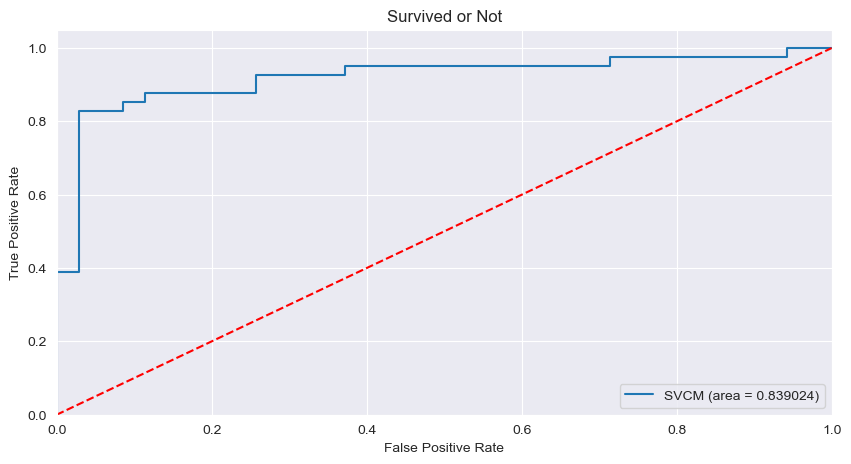

In [64]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, SVM_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVCM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
DT_model = classifier.fit(X_train_scaled, y_train)
y_pred_DT = DT_model.predict(X_test_scaled)
y_pred_DT

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_DT))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_DT))
print('roc auc score: ', roc_auc_score(y_test, y_pred_DT))
print('recall score: ', recall_score(y_test, y_pred_DT))
print('precesion score: ', precision_score(y_test, y_pred_DT))
print('f1 score: ', f1_score(y_test, y_pred_DT))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_DT))

confiion martrix: 
 [[29  6]
 [16 25]]

accuracy_score 0.7105263157894737
roc auc score:  0.7191637630662021
recall score:  0.6097560975609756
precesion score:  0.8064516129032258
f1 score:  0.6944444444444445

classification report:

               precision    recall  f1-score   support

           0       0.64      0.83      0.73        35
           1       0.81      0.61      0.69        41

    accuracy                           0.71        76
   macro avg       0.73      0.72      0.71        76
weighted avg       0.73      0.71      0.71        76



In [86]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=DT_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [0.009 0.01  0.008 0.011]
score_time [0.039 0.033 0.047 0.046]
test_f1 [0.7619 0.7869 0.7419 0.6923]
test_roc_auc [0.7333 0.7717 0.7103 0.7303]
test_recall [0.7742 0.7742 0.7667 0.5806]
test_precision [0.75   0.8    0.7188 0.8571]
test_accuracy [0.7368 0.7719 0.7143 0.7143]


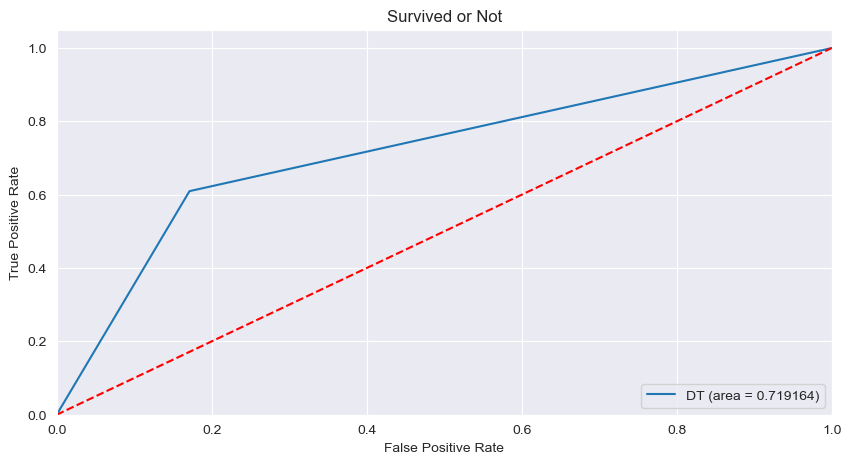

In [87]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, DT_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, DT_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='DT (area = %02f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=42)
RF_model = classifier.fit(X_train_scaled, y_train)
y_pred_RF = RF_model.predict(X_test_scaled)
y_pred_RF

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, \
                                                    confusion_matrix, classification_report
print('confiion martrix: \n', confusion_matrix(y_test, y_pred_RF))
print()
print('accuracy_score', accuracy_score(y_test, y_pred_RF))
print('roc auc score: ', roc_auc_score(y_test, y_pred_RF))
print('recall score: ', recall_score(y_test, y_pred_RF))
print('precesion score: ', precision_score(y_test, y_pred_RF))
print('f1 score: ', f1_score(y_test, y_pred_RF))
print()
print('classification report:\n\n', classification_report(y_test, y_pred_RF))

confiion martrix: 
 [[30  5]
 [ 8 33]]

accuracy_score 0.8289473684210527
roc auc score:  0.8310104529616725
recall score:  0.8048780487804879
precesion score:  0.868421052631579
f1 score:  0.8354430379746836

classification report:

               precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [90]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=RF_model, X=X_train_scaled, y=y_train, cv=4, scoring = ['f1', 'roc_auc', 
                                                                                             'recall', 'precision', 
                                                                                              'accuracy'])
for key, value in accuracies.items():
    print(key, value)

fit_time [0.3143 0.2762 0.3072 0.3232]
score_time [0.067  0.0701 0.0991 0.1031]
test_f1 [0.8    0.8333 0.7812 0.8525]
test_roc_auc [0.9069 0.8896 0.8827 0.9206]
test_recall [0.7742 0.8065 0.8333 0.8387]
test_precision [0.8276 0.8621 0.7353 0.8667]
test_accuracy [0.7895 0.8246 0.75   0.8393]


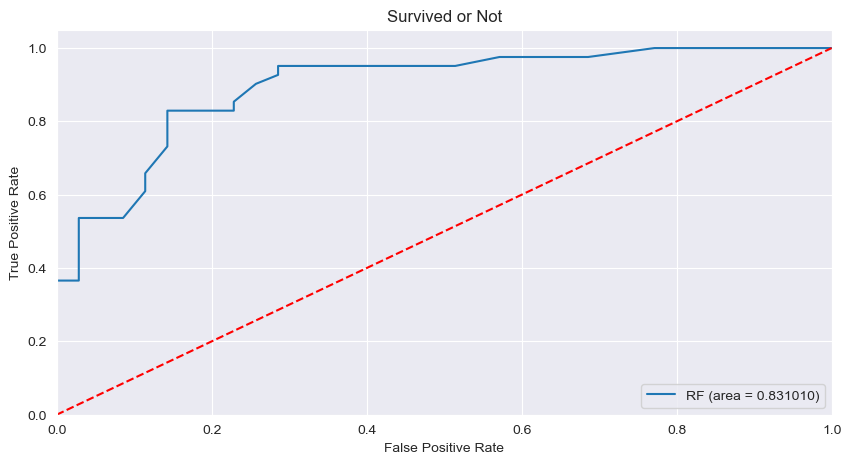

In [91]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='RF (area = %02f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.show()